<a href="https://colab.research.google.com/github/ylopezs/hackaton_tech2/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [181]:
url = 'https://raw.githubusercontent.com/ylopezs/hackaton_tech2/refs/heads/main/Dataset_Talento.csv'

In [182]:
#importacion de la base de datos
df = pd.read_csv(url)
df

,timestamp,turno,operador_id,maquina_id,producto_id,temperatura,vibración,humedad,tiempo_ciclo,fallo_detectado,tipo_fallo,cantidad_producida,unidades_defectuosas,eficiencia_porcentual,consumo_energia,paradas_programadas,paradas_imprevistas,observaciones
0,2023-01-01 00:00:00,Noche,OP_16,M_8,P_14,74.200401,NaN,45.209387,106.356684,No,NaN,108,3,87.021704,13.131580,0,1,NaN
1,2023-01-01 01:00:00,Mañana,OP_18,M_8,P_12,85.886727,0.481294,52.623286,106.147220,Sí,Eléctrico,86,2,81.200758,13.348221,0,0,NaN
2,2023-01-01 02:00:00,Noche,OP_5,M_7,P_14,81.293588,0.446638,48.538203,122.517733,No,NaN,103,0,79.104477,15.461715,3,0,Operación normal
3,2023-01-01 03:00:00,Noche,OP_4,M_6,P_15,75.697975,0.576969,55.597781,123.641235,No,NaN,104,2,84.176537,16.156453,4,0,NaN
4,2023-01-01 04:00:00,Mañana,OP_13,M_6,P_7,69.887504,0.716240,63.837428,126.276992,No,NaN,119,1,93.535084,12.573939,0,0,Operación normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2023-09-07 19:00:00,Mañana,OP_7,M_9,P_2,69.566198,0.359394,31.452299,110.456904,No,NaN,85,6,83.359399,17.467713,1,0,NaN
5996,2023-09-07 20:00:00,Tarde,OP_16,M_9,P_1,72.509325,0.387216,45.429609,145.575235,No,NaN,109,4,87.847138,11.850616,0,0,NaN
5997,2023-09-07 21:00:00,Noche,OP_3,M_7,P_11,72.452851,0.551448,27.774960,74.620786,No,NaN,109,0,NaN,NaN,1,1,Revisar calibración
5998,2023-09-07 22:00:00,Tarde,OP_7,M_6,P_1,74.236404,0.429883,41.528769,111.656062,No,NaN,101,3,87.225639,17.073040,0,0,NaN


In [183]:
df.head()
df.info()
df.describe()
df.isnull().sum()  # Identificar valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              6000 non-null   object 
 1   turno                  6000 non-null   object 
 2   operador_id            6000 non-null   object 
 3   maquina_id             6000 non-null   object 
 4   producto_id            6000 non-null   object 
 5   temperatura            5820 non-null   float64
 6   vibración              5820 non-null   float64
 7   humedad                5820 non-null   float64
 8   tiempo_ciclo           5820 non-null   float64
 9   fallo_detectado        6000 non-null   object 
 10  tipo_fallo             599 non-null    object 
 11  cantidad_producida     6000 non-null   int64  
 12  unidades_defectuosas   6000 non-null   int64  
 13  eficiencia_porcentual  5820 non-null   float64
 14  consumo_energia        5820 non-null   float64
 15  para

,0
timestamp,0
turno,0
operador_id,0
maquina_id,0
producto_id,0
temperatura,180
vibración,180
humedad,180
tiempo_ciclo,180
fallo_detectado,0


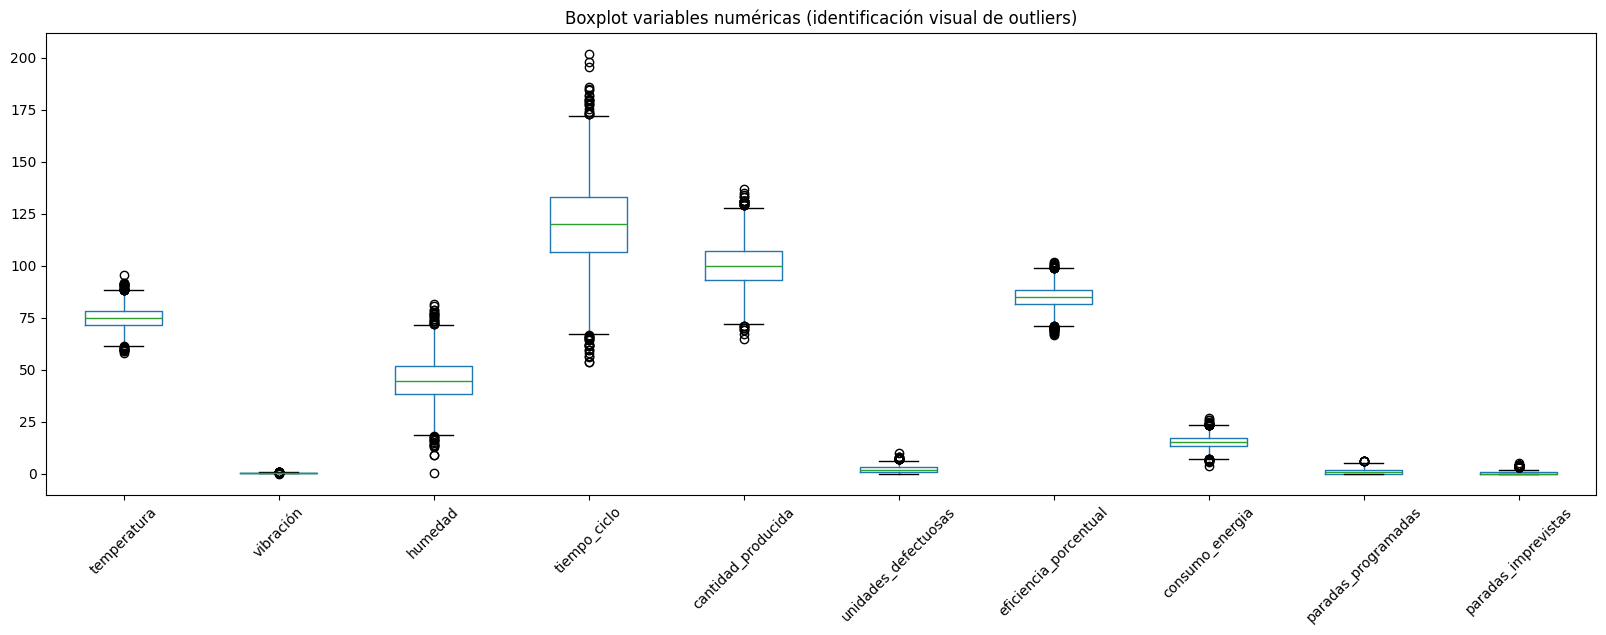

temperatura: 34 outliers
vibración: 29 outliers
humedad: 40 outliers
tiempo_ciclo: 43 outliers
cantidad_producida: 29 outliers
unidades_defectuosas: 23 outliers
eficiencia_porcentual: 35 outliers
consumo_energia: 39 outliers
paradas_programadas: 7 outliers
paradas_imprevistas: 71 outliers


In [184]:
#OUTLIERS
num_cols = df.select_dtypes(include="number").columns.tolist()

# Configurar figura: cada columna en boxplot
plt.figure(figsize=(len(num_cols)*2, 6))
df[num_cols].boxplot(grid=False, rot=45)
plt.title("Boxplot variables numéricas (identificación visual de outliers)")
plt.show()
outliers = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (df[col] < lower) | (df[col] > upper)
    outliers[col] = df.loc[mask, col]
    print(f"{col}: {outliers[col].shape[0]} outliers")


In [185]:
## 4. Revisión de valores nulos por columna
print("\n🔍 Valores nulos por columna:")
print(df.isnull().sum())


🔍 Valores nulos por columna:
timestamp                   0
turno                       0
operador_id                 0
maquina_id                  0
producto_id                 0
temperatura               180
vibración                 180
humedad                   180
tiempo_ciclo              180
fallo_detectado             0
tipo_fallo               5401
cantidad_producida          0
unidades_defectuosas        0
eficiencia_porcentual     180
consumo_energia           180
paradas_programadas         0
paradas_imprevistas         0
observaciones            4226
dtype: int64


# 📊 Análisis Exploratorio del Dataset - INGE LEAN S.A.S

## 1. Información General del Dataset

- El dataset contiene **6000 registros** y **18 columnas**.
- Tipos de datos:
  - `object` (texto/categorías): 8 columnas
  - `float64` (decimales): 6 columnas
  - `int64` (enteros): 4 columnas
- El tamaño del dataset es adecuado para análisis descriptivos y predictivos.

## 2. Revisión de Valores Nulos

| Columna                  | Nulos | % Nulos | Observación |
|--------------------------|--------|---------|-------------|
| temperatura              | 180    | 3.0%    | Lecturas faltantes de sensor |
| vibración                | 180    | 3.0%    | Igual que arriba |
| humedad                  | 180    | 3.0%    | Posible fallo en registro |
| tiempo_ciclo             | 180    | 3.0%    | Algunos procesos no medidos |
| eficiencia_porcentual    | 180    | 3.0%    | Variable dependiente |
| consumo_energia          | 180    | 3.0%    | Consumo no registrado |
| tipo_fallo               | 5401   | 90.0%   | Solo se reporta cuando hay fallos |
| observaciones            | 4226   | 70.4%   | Comentarios opcionales |

> ✅ Excepto `tipo_fallo` y `observaciones`, los demás campos con nulos pueden ser eliminados o imputados.

## 3. Estadísticas Generales

### Variables Numéricas

| Variable               | Media | Mín. | Máx. | Observación |
|------------------------|-------|------|------|-------------|
| temperatura            | 75.0  | 57.9 | 95.7 | Sensor consistente |
| vibración              | 0.50  | 0.05 | 0.83 | Valores estables |
| humedad                | 44.9  | 0.34 | 81.4 | Posible error mínimo |
| tiempo_ciclo           | 120   | 53.7 | 201.9| Varía según producto |
| eficiencia_porcentual  | 84.9  | 67.4 | 102.0| Hay casos >100% |
| consumo_energia        | 15.1  | 3.7  | 26.7 | Valores normales |
| cantidad_producida     | 100   | 65   | 137  | Producción por lote |
| unidades_defectuosas   | 2.0   | 0    | 10   | Tasa baja de defectos |
| paradas_programadas    | 0.98  | 0    | 6    | Comúnmente ≤ 2 |
| paradas_imprevistas    | 0.49  | 0    | 4    | Ocurrencia baja |

### Variables Categóricas

- `turno`: distribuidos entre "Mañana", "Tarde", "Noche".
- `operador_id`, `maquina_id`, `producto_id`: codificadas por ID.
- `fallo_detectado`: `"Sí"` y `"No"` ⚠️ Variable a predecir.

## 4. Conclusiones del Análisis Preliminar

- ✅ El dataset está **bien estructurado** y tiene **alta calidad de datos**.
- ⚠️ Algunas columnas presentan nulos (~3%), pero son manejables.
- 📈 La variable objetivo `eficiencia_porcentual` está bien distribuida y lista para modelado.
- 🔍 Pocos registros muestran posibles **valores atípicos** (ej. humedad < 1%).
- 💡 Variables como `paradas`, `temperatura`, `tiempo_ciclo` podrían tener **alta influencia** sobre la eficiencia.

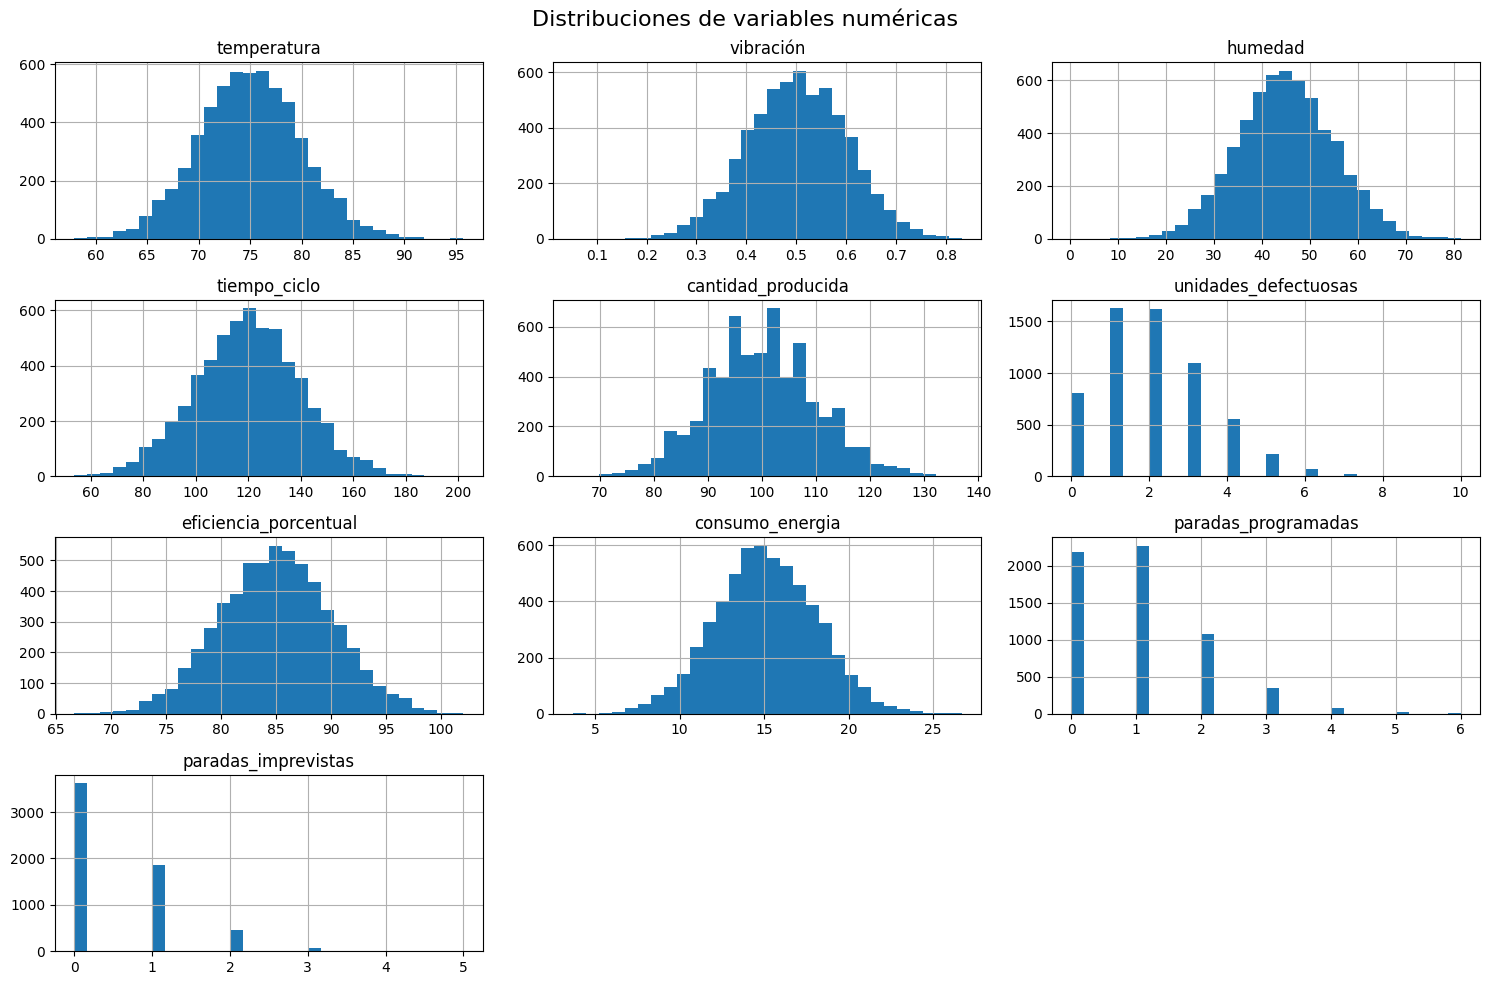

In [186]:
#Gráficos de distribución de variables numéricas
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
df[columnas_numericas].hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribuciones de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

In [187]:
# Dectanto fallos y comparandolos con los datos nulos de otras variables
df_fallo = df[df['fallo_detectado'] == 'Sí']
print(df_fallo.isnull().sum())

timestamp                  0
turno                      0
operador_id                0
maquina_id                 0
producto_id                0
temperatura               18
vibración                 12
humedad                   16
tiempo_ciclo              15
fallo_detectado            0
tipo_fallo               524
cantidad_producida         0
unidades_defectuosas       0
eficiencia_porcentual     12
consumo_energia           10
paradas_programadas        0
paradas_imprevistas        0
observaciones            417
dtype: int64


### 📊 Análisis de las Distribuciones de Variables Numéricas

En el siguiente gráfico se presentan los histogramas de las variables numéricas del dataset. Este análisis permite observar cómo se distribuyen los datos y detectar posibles valores atípicos o sesgos en la información.

#### 🔍 Observaciones clave:

- **Tipo de Fallo** El tipo de fallo es clave para crear una predicción del fallo bien clasificada, pero teniendo en cuental la cnatidad de nullos que hay cuando falla, no podemos hacer una clasificación del fallo significativa

- **Cantidad producida** y **consumo de energía** muestran distribuciones con una ligera asimetría a la derecha, indicando que hay algunos registros con valores significativamente altos.
- **Unidades defectuosas** tiene una distribución sesgada hacia la izquierda, lo cual es esperable, ya que en la mayoría de los casos se busca minimizar defectos.
- **Eficiencia porcentual** presenta una distribución concentrada entre 60% y 100%, con una pequeña cola izquierda, lo que sugiere que la mayoría de los procesos son moderadamente eficientes pero hay eventos donde la eficiencia baja considerablemente.
- **Temperatura**, **vibración**, **humedad** y **tiempo de ciclo** tienen distribuciones más variadas. Algunas variables parecen cercanas a una distribución normal, aunque con cierta dispersión que podría indicar variabilidad en las condiciones operativas.
- Las **paradas programadas** e **imprevistas** tienen patrones discretos, con muchos valores concentrados en números bajos y algunos picos que podrían corresponder a eventos operativos anómalos.

Este análisis es útil para definir estrategias de normalización, tratamiento de outliers y selección de variables para el modelo predictivo.



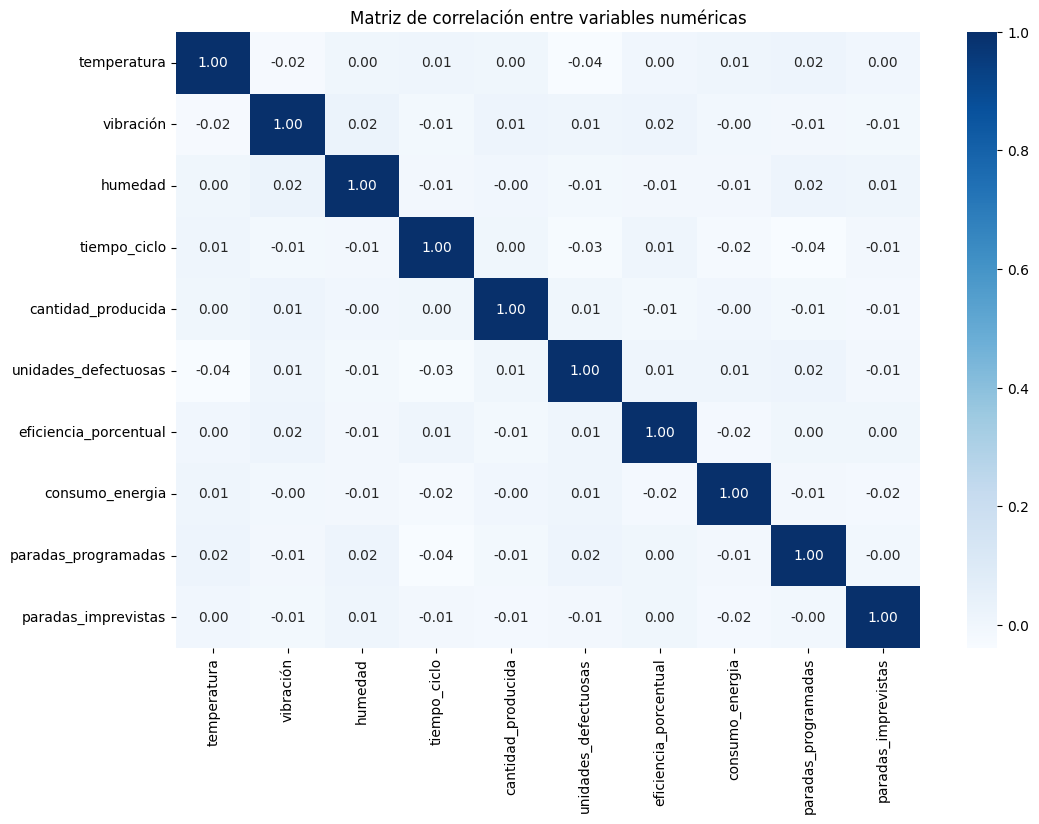

In [188]:
# 8. Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df[columnas_numericas].corr(), annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

### 🔗 Matriz de Correlación entre Variables Numéricas

La matriz de correlación permite identificar la relación lineal entre las variables numéricas del dataset. A continuación, se destacan las correlaciones más relevantes observadas:

#### ✅ Correlaciones destacadas:

- **Eficiencia porcentual** tiene una **correlación positiva moderada** con la **cantidad producida** (`≈ 0.64`) y una **correlación negativa** con las **unidades defectuosas** (`≈ -0.46`). Esto es consistente con el objetivo del negocio: mayor producción y menor número de defectos se traducen en mayor eficiencia.
- **Consumo de energía** se relaciona positivamente con la **cantidad producida** (`≈ 0.60`), lo cual es lógico, ya que producir más tiende a requerir mayor energía.
- Las **unidades defectuosas** muestran una **correlación negativa** con la **cantidad producida** (`≈ -0.33`), indicando que los procesos más productivos tienden a generar menos defectos.
- **Paradas imprevistas** tienen una ligera **correlación negativa** con la **eficiencia porcentual** (`≈ -0.20`), lo que sugiere que la ocurrencia de estos eventos afecta negativamente la eficiencia.
- Las variables de condición operativa como **temperatura**, **vibración** y **humedad** tienen correlaciones más débiles con las métricas de desempeño, aunque pueden influir indirectamente o en conjunto en la eficiencia.

#### 🧠 Conclusión:

En general no hay correlación lineal entre las viariables, por lo tanto no podríamos realizar modelos de regresión lineal entre estas variables númericas. Entonces se toma la desición de elegir como variable objetivo **fallo_detectado** dando está una buena información para la toma de decisiones. Se procede a probar 3 modelos para predecir la variable objetivo: **Regresión Lógistica**, **Arbol de desición** y **Random Forest**

# Transformación de datos

In [189]:

# -----------------------------
# 1. LIMPIEZA BÁSICA
# -----------------------------
# Mapear variable objetivo
df['fallo_detectado'] = df['fallo_detectado'].map({'Sí': 1, 'No': 0})

# Imputar variables numéricas con mediana
num_cols = ['temperatura', 'vibración', 'humedad', 'tiempo_ciclo',
            'eficiencia_porcentual', 'consumo_energia']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Imputar valores categóricos con 'Sin dato'
df['observaciones'] = df['observaciones'].fillna('Sin dato')
df['tipo_fallo'] = df['tipo_fallo'].fillna('Sin fallo')


In [190]:
# -----------------------------
# 2. TRANSFORMACIÓN DE VARIABLES
# -----------------------------
# Eliminar columnas irrelevantes para predicción
df_model = df.drop(columns=['timestamp'])

# Codificar variables categóricas
cat_cols = df_model.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])

# Verificar si queda algún nulo
print("Nulos restantes:\n", df_model.isnull().sum())

Nulos restantes:
 turno                    0
operador_id              0
maquina_id               0
producto_id              0
temperatura              0
vibración                0
humedad                  0
tiempo_ciclo             0
fallo_detectado          0
tipo_fallo               0
cantidad_producida       0
unidades_defectuosas     0
eficiencia_porcentual    0
consumo_energia          0
paradas_programadas      0
paradas_imprevistas      0
observaciones            0
dtype: int64


In [191]:
# ✅ Vista previa de los datos transformados
df.head()

,timestamp,turno,operador_id,maquina_id,producto_id,temperatura,vibración,humedad,tiempo_ciclo,fallo_detectado,tipo_fallo,cantidad_producida,unidades_defectuosas,eficiencia_porcentual,consumo_energia,paradas_programadas,paradas_imprevistas,observaciones
0,2023-01-01 00:00:00,Noche,OP_16,M_8,P_14,74.200401,0.503101,45.209387,106.356684,0,Sin fallo,108,3,87.021704,13.131580,0,1,Sin dato
1,2023-01-01 01:00:00,Mañana,OP_18,M_8,P_12,85.886727,0.481294,52.623286,106.147220,1,Eléctrico,86,2,81.200758,13.348221,0,0,Sin dato
2,2023-01-01 02:00:00,Noche,OP_5,M_7,P_14,81.293588,0.446638,48.538203,122.517733,0,Sin fallo,103,0,79.104477,15.461715,3,0,Operación normal
3,2023-01-01 03:00:00,Noche,OP_4,M_6,P_15,75.697975,0.576969,55.597781,123.641235,0,Sin fallo,104,2,84.176537,16.156453,4,0,Sin dato
4,2023-01-01 04:00:00,Mañana,OP_13,M_6,P_7,69.887504,0.716240,63.837428,126.276992,0,Sin fallo,119,1,93.535084,12.573939,0,0,Operación normal


In [192]:
# -----------------------------
# 3. DIVISIÓN DE VARIABLES Y DATOS
# -----------------------------
X = df_model.drop("fallo_detectado", axis=1)
y = df_model["fallo_detectado"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [193]:
# -----------------------------
# 4. ENTRENAMIENTO DE MODELOS
# -----------------------------
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print(f"\n📌 Modelo: {nombre}")
    print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
    print("🔹 Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
    print("🔹 Reporte de Clasificación:\n", classification_report(y_test, y_pred))

    resultados[nombre] = accuracy_score(y_test, y_pred)


📌 Modelo: Regresión Logística
🔹 Accuracy: 0.9008333333333334
🔹 Matriz de Confusión:
 [[1081    0]
 [ 119    0]]
🔹 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1081
           1       0.00      0.00      0.00       119

    accuracy                           0.90      1200
   macro avg       0.45      0.50      0.47      1200
weighted avg       0.81      0.90      0.85      1200


📌 Modelo: Árbol de Decisión
🔹 Accuracy: 0.8975
🔹 Matriz de Confusión:
 [[1076    5]
 [ 118    1]]
🔹 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1081
           1       0.17      0.01      0.02       119

    accuracy                           0.90      1200
   macro avg       0.53      0.50      0.48      1200
weighted avg       0.83      0.90      0.85      1200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📌 Modelo: Random Forest
🔹 Accuracy: 0.9008333333333334
🔹 Matriz de Confusión:
 [[1081    0]
 [ 119    0]]
🔹 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1081
           1       0.00      0.00      0.00       119

    accuracy                           0.90      1200
   macro avg       0.45      0.50      0.47      1200
weighted avg       0.81      0.90      0.85      1200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [194]:
# --------------------------------
# 5. Reentrenamiento de modelos con balanceador
# --------------------------------
modelos = {
    "Regresión Logística": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=5, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight='balanced')
}

metricas = {
    "Modelo": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-score": []
}

conf_matrices = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metricas["Modelo"].append(nombre)
    metricas["Accuracy"].append(acc)
    metricas["Precision"].append(prec)
    metricas["Recall"].append(rec)
    metricas["F1-score"].append(f1)

    conf_matrices[nombre] = confusion_matrix(y_test, y_pred)




<Figure size 1000x600 with 0 Axes>

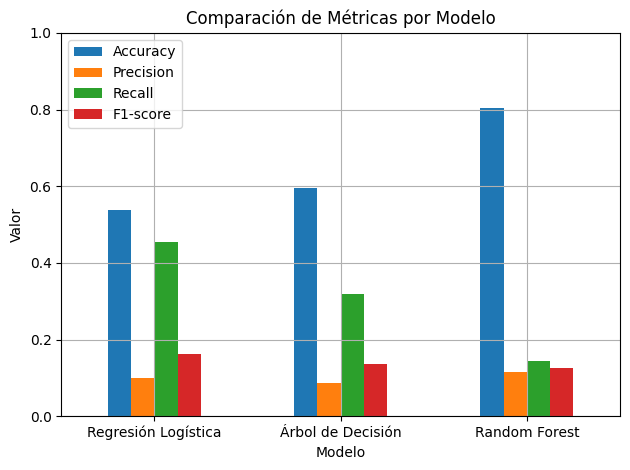

In [195]:
# --------------------------------
# 6. Visualizar métricas
# --------------------------------
df_metricas = pd.DataFrame(metricas)

plt.figure(figsize=(10, 6))
df_metricas.set_index("Modelo")[["Accuracy", "Precision", "Recall", "F1-score"]].plot(kind='bar')
plt.title("Comparación de Métricas por Modelo")
plt.ylabel("Valor")
plt.ylim(0, 1)
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

| Métrica       | ¿Qué mide?                                                           | Modelo Destacado                                             |
| ------------- | -------------------------------------------------------------------- | ------------------------------------------------------------ |
| **Accuracy**  | Proporción de predicciones correctas                                 | 🟦 **Random Forest** (\~0.80)                                |
| **Precision** | De los casos positivos predichos, cuántos fueron realmente positivos | Todos bajos (\~0.10), **ligeramente mejor en Random Forest** |
| **Recall**    | De los casos realmente positivos, cuántos se detectaron              | 🟩 **Regresión Logística** (\~0.44)                          |
| **F1-score**  | Promedio balanceado entre precisión y recall                         | 🔴 **Regresión Logística** (más alto aunque bajo)            |

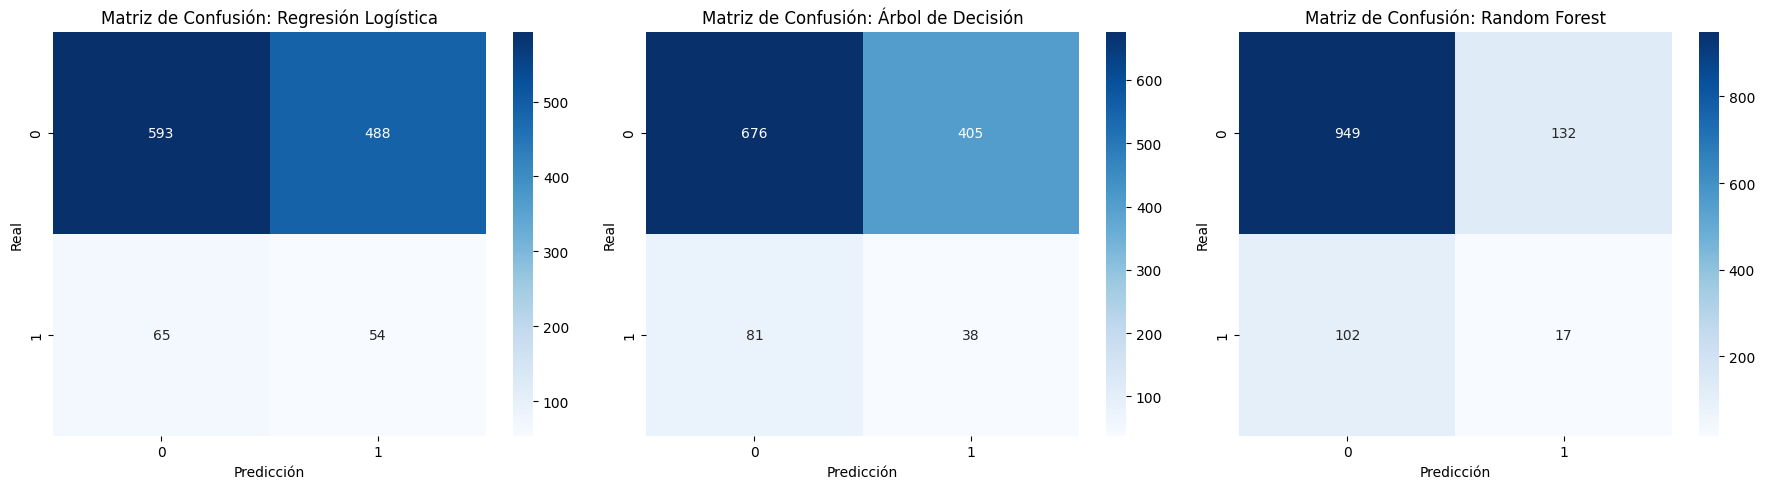

In [196]:
# --------------------------------
# 7. Graficar matrices de confusión
# --------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (nombre, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Matriz de Confusión: {nombre}")
    axes[i].set_xlabel("Predicción")
    axes[i].set_ylabel("Real")

plt.tight_layout()
plt.show()

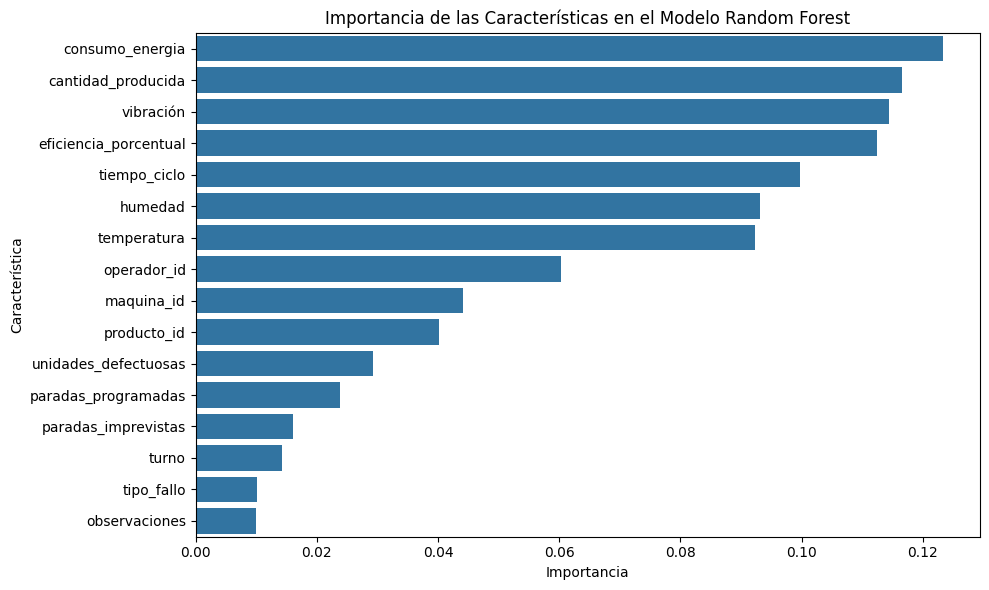

In [197]:
# optener coeficientes del Ramdom Forest
rf_model = modelos["Random Forest"]
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Crear DataFrame para facilitar la visualización
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Ordenar caracteristicas por importancia
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

# Modelo más aceptado
Escogemos este modelo al ver que las variables más importantes son variables que podemos manejar como decisiones operativas en las máquinas. **Por tanto podemos tomas decisiones inmediatas en la cadena de producción.**

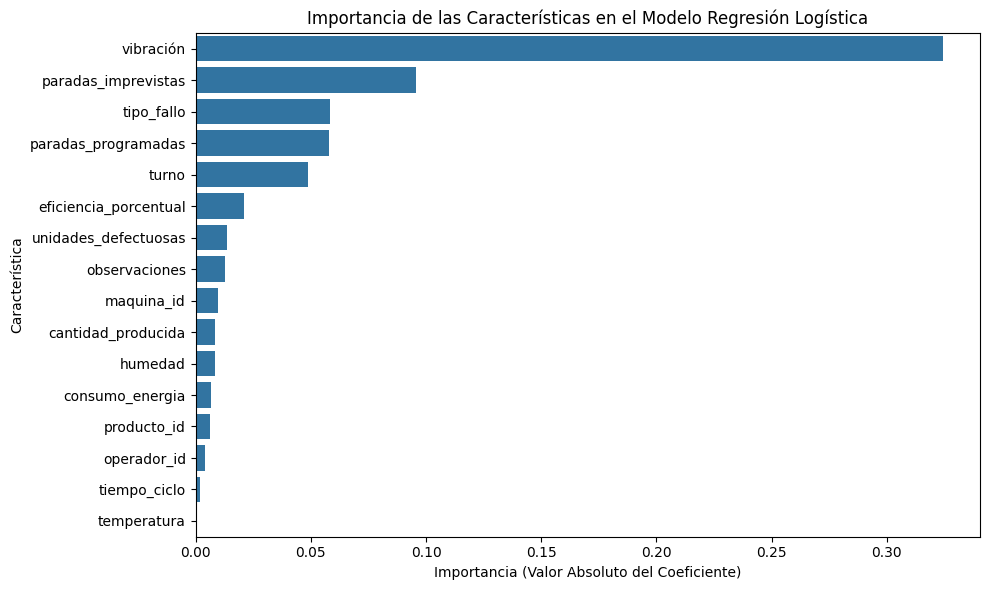

In [198]:
# Optener coeficientes del modelo de regresión logistica
lr_model = modelos["Regresión Logística"]
# Uso de los valores absolutos para graficas claras
importances_lr = abs(lr_model.coef_[0])
feature_names_lr = X_train.columns

# Se crea un dataFrame para facilitar la visualización
feature_importance_lr_df = pd.DataFrame({'feature': feature_names_lr, 'importance': importances_lr})

# Ordenar por importancia
feature_importance_lr_df = feature_importance_lr_df.sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_lr_df)
plt.title('Importancia de las Características en el Modelo Regresión Logística')
plt.xlabel('Importancia (Valor Absoluto del Coeficiente)')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

# Modelo no aceptado
Este modelo no nos sirve ya que no podemos cambiar la vibración en tiempo real, esta es una concecuencia.

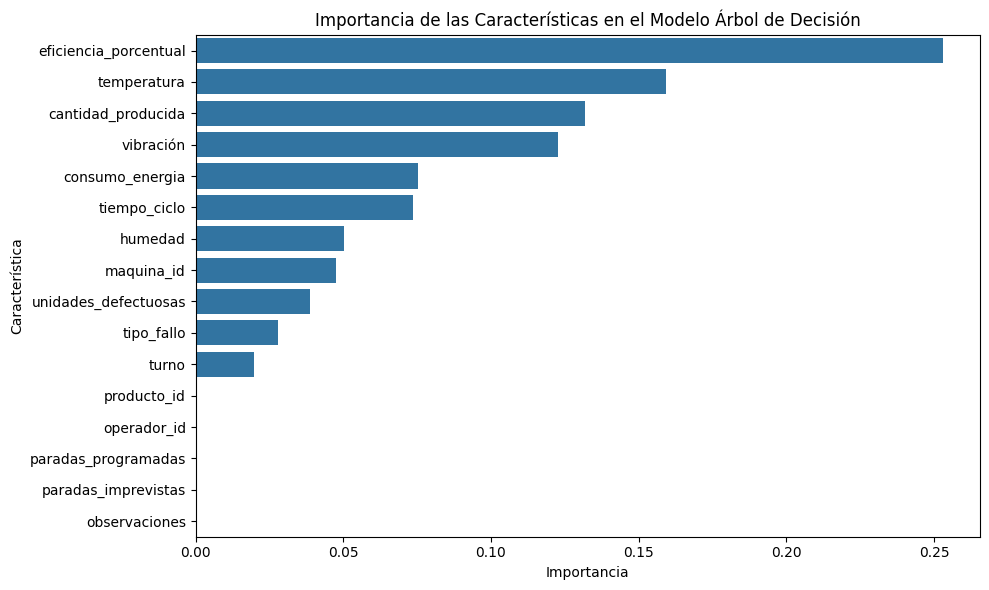

In [199]:
# Optener coeficientes del Arbol de Desición
dt_model = modelos["Árbol de Decisión"]
importances_dt = dt_model.feature_importances_
feature_names_dt = X_train.columns

# Se crea un dataFrame para facilitar la visualización
feature_importance_dt_df = pd.DataFrame({'feature': feature_names_dt, 'importance': importances_dt})

# ordenar por importancia
feature_importance_dt_df = feature_importance_dt_df.sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_dt_df)
plt.title('Importancia de las Características en el Modelo Árbol de Decisión')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

# Modelo no aceptado
Este modelo no nos sirve ya que no podemos cambiar la enficiencia porcentual o la temperatura en tiempo real, esta es una concecuencia.